# Chapter 5: Generalizing Gradient Descent
-----
## Gradient Descent Learning with Multiple Inputs

Gradients descent can also be used with multiple inputs.

In [2]:
def multi_input_learning():
    # Basic implementation
    def w_sum(a:list[float], b:list[float]) -> float:
        output = 0
        assert(len(a) == len(b))

        for i in range(len(a)):
            output += a[i] * b[i]

        return output

    def neural_network(input:list[float], weights:list[float]) -> float:
        pred = w_sum(input, weights)
        return pred

    def ele_mul(number:float, vector:list[float]) -> list[float]:
        output = [0, 0, 0]

        assert(len(output) == len(vector))

        for i in range(len(vector)):
            output[i] = number * vector[i]

        return output

    # Starting weights
    weights = [0.1, 0.2, -.1]

    # Inputs
    toes = [8.5, 9.5, 9.9, 9.0]
    win_loss_record = [0.65, 0.8, 0.8, 0.9]
    num_fans = [1.2, 1.3, 0.5, 1.0]

    # Goal
    win_or_lose_binary = [1, 1, 0, 1]

    inputs = [toes[0], win_loss_record[0], num_fans[0]]
    goal = win_or_lose_binary[0]
    pred = neural_network(inputs, weights)

    error = (pred - goal) ** 2
    delta = pred - goal

    # Calculate the new weight deltas
    weighted_deltas = ele_mul(delta, inputs)

    alpha = 0.01

    print(f"Old weights: {weights}")
    print(f"Error: {error}")
    # Update the weights
    for i in range(len(weights)):
        weights[i] = weights[i] - (weighted_deltas[i] * alpha)
    print(f"New weights: {weights}")
    print(f"Weighted deltas: {weighted_deltas}")
    
multi_input_learning()

Old weights: [0.1, 0.2, -0.1]
Error: 0.01959999999999997
New weights: [0.1119, 0.20091, -0.09832]
Weighted deltas: [-1.189999999999999, -0.09099999999999994, -0.16799999999999987]


## How do we turn a single delta into multiple weighted_deltas?

Recall, we want our **weighted_deltas** to have the properties which make up __gradient descent__:
- **stopping** makes it so that if the **input** is 0, then no change is made to the **weight**.
- **negative reversal** makes it so that if the **input** is *negative* then the *direction* we need to change the **weight** is opposite to when it is **positive**. Multiplying by the **input** will have the effect of reversing the *direction* resulting in the correct movement.
- **scaling** allows us to adjust the **amount** moved relative to both the **pure error** and **input**. This can often go out of control, which we will use *alpha* to address.


With a single input we would calculate $weighted\_delta = delta * input$. With multiple inputs, we want to multiply delta by a vector of inputs, so it would be a scalar multiplication with a matrix. So we would calculate $weighted\_deltas = delta * \begin{pmatrix}i_1\\ i_2\\ ...\\ i_n\end{pmatrix}$. 

We can then update the weights as usual with $weights[i] = weights[i] - alpha * weighted\_deltas[i]$.

## Lets watch several steps of learning for a multiple input neural network

In [21]:
def multi_input_learning_by_increments(steps:int):
    def w_sum(a:list[float], b:list[float]) -> float:
        output = 0
        assert(len(a) == len(b))

        for i in range(len(a)):
            output += a[i] * b[i]

        return output

    def neural_network(input:list[float], weights:list[float]) -> float:
        pred = w_sum(input, weights)
        return pred

    def ele_mul(number:float, vector:list[float]) -> list[float]:
        output = [0, 0, 0]

        assert(len(output) == len(vector))

        for i in range(len(vector)):
            output[i] = number * vector[i]

        return output

     # Starting weights
    starting_weights = [0.1, 0.2, -.1]
    current_weights = list()
    current_weights.extend(starting_weights)

    # Inputs
    toes = [8.5, 9.5, 9.9, 9.0]
    win_loss_record = [0.65, 0.8, 0.8, 0.9]
    num_fans = [1.2, 1.3, 0.5, 1.0]

    # Goal
    win_or_lose_binary = [1, 1, 0, 1]
    
    # Alpha
    alpha = 0.01

    inputs = [toes[0], win_loss_record[0], num_fans[0]]
    goal = win_or_lose_binary[0]
    for step in range(steps):
        pred = neural_network(inputs, current_weights)

        error = (pred - goal) ** 2
        delta = pred - goal

        # Calculate the new weight deltas
        weighted_deltas = ele_mul(delta, inputs)
        print(f"Step: {step+1}")
        print(f"Error: {error}")
        print(f"Delta: {delta}")
        print(f"Old Weights: {current_weights}")
        # Update the weights
        for i in range(len(starting_weights)):
            current_weights[i] = current_weights[i] - (weighted_deltas[i] * alpha)
        print(f"New Weights: {current_weights}")
        
    print("-----Results-----")
    for i in range(len(starting_weights)):
        print(f"Weight {i} Delta: {abs(starting_weights[i]-current_weights[i])}")
    
multi_input_learning_by_increments(3)

Step: 1
Error: 0.01959999999999997
Delta: -0.1399999999999999
Old Weights: [0.1, 0.2, -0.1]
New Weights: [0.1119, 0.20091, -0.09832]
Step: 2
Error: 0.0013135188062500048
Delta: -0.036242500000000066
Old Weights: [0.1119, 0.20091, -0.09832]
New Weights: [0.11498061250000001, 0.20114557625, -0.09788509000000001]
Step: 3
Error: 8.802712522307997e-05
Delta: -0.009382277187499843
Old Weights: [0.11498061250000001, 0.20114557625, -0.09788509000000001]
New Weights: [0.1157781060609375, 0.20120656105171877, -0.09777250267375001]
-----Results-----
Weight 0 Delta: 0.01577810606093749
Weight 1 Delta: 0.001206561051718763
Weight 2 Delta: 0.002227497326249994


Takeaways:
- Notice that Weight 0, corresponding to Input 0 had a much more drastic change than the other weights. This is because Input 0 is much larger than the other inputs.
- A subfield of AI called __normalization__ helps encourage learning across all weights despite dataset characteristics like in this case.

## Freezing one weight: What does it do?

Now, lets do this again except Weight 0 will not be changed to see how the network responds.

In [23]:
def multi_input_learning_with_frozen_weight(steps:int, frozen_weight_index:int):
    def w_sum(a:list[float], b:list[float]) -> float:
        output = 0
        assert(len(a) == len(b))

        for i in range(len(a)):
            output += a[i] * b[i]

        return output

    def neural_network(input:list[float], weights:list[float]) -> float:
        pred = w_sum(input, weights)
        return pred

    def ele_mul(number:float, vector:list[float]) -> list[float]:
        output = [0, 0, 0]

        assert(len(output) == len(vector))

        for i in range(len(vector)):
            output[i] = number * vector[i]

        return output

     # Starting weights
    starting_weights = [0.1, 0.2, -.1]
    current_weights = list()
    current_weights.extend(starting_weights)

    # Inputs
    toes = [8.5, 9.5, 9.9, 9.0]
    win_loss_record = [0.65, 0.8, 0.8, 0.9]
    num_fans = [1.2, 1.3, 0.5, 1.0]

    # Goal
    win_or_lose_binary = [1, 1, 0, 1]
    
    # Alpha
    alpha = 0.3

    inputs = [toes[0], win_loss_record[0], num_fans[0]]
    goal = win_or_lose_binary[0]
    for step in range(steps):
        pred = neural_network(inputs, current_weights)

        error = (pred - goal) ** 2
        delta = pred - goal

        # Calculate the new weight deltas
        weighted_deltas = ele_mul(delta, inputs)

        # Freeze one weight by changing the weighted_delta to 0
        weighted_deltas[frozen_weight_index] = 0

        print(f"Step: {step+1}")
        print(f"Error: {error}")
        print(f"Delta: {delta}")
        print(f"Old Weights: {current_weights}")
        # Update the weights
        for i in range(len(starting_weights)):
            current_weights[i] = current_weights[i] - (weighted_deltas[i] * alpha)
        print(f"New Weights: {current_weights}")
        
    print("-----Results-----")
    for i in range(len(starting_weights)):
        print(f"Weight {i} Delta: {abs(starting_weights[i]-current_weights[i])}")
    
multi_input_learning_with_frozen_weight(3,0)

Step: 1
Error: 0.01959999999999997
Delta: -0.1399999999999999
Old Weights: [0.1, 0.2, -0.1]
New Weights: [0.1, 0.2273, -0.04960000000000005]
Step: 2
Error: 0.003816150624999989
Delta: -0.06177499999999991
Old Weights: [0.1, 0.2273, -0.04960000000000005]
New Weights: [0.1, 0.239346125, -0.02736100000000008]
Step: 3
Error: 0.000743010489422852
Delta: -0.027258218750000007
Old Weights: [0.1, 0.239346125, -0.02736100000000008]
New Weights: [0.1, 0.24466147765625, -0.017548041250000077]
-----Results-----
Weight 0 Delta: 0.0
Weight 1 Delta: 0.044661477656249976
Weight 2 Delta: 0.08245195874999993


As we can see in the output, the error is still converging on 0 even though we froze the weight of input[0].

We can see below that even though input[0], displayed as __A__ in the diagram below, is frozen, the graph still converges on zero error.

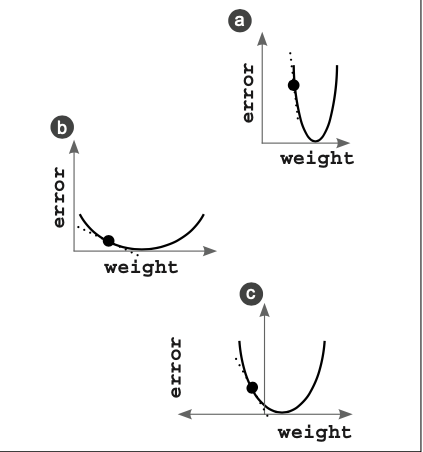
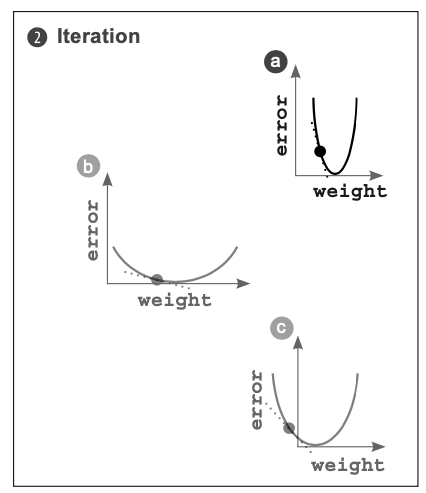
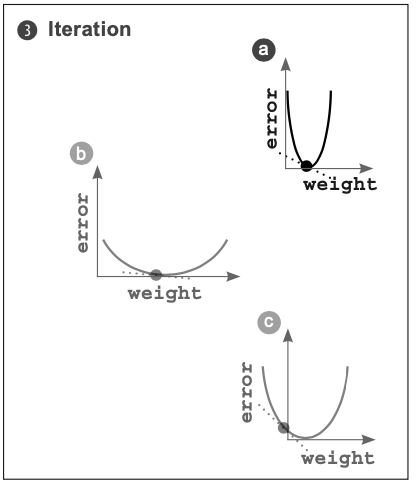

Its important to note, since the weight on A didn't change, in order for it to reach zero error, the graph's position must change since the dot will still have the same weight (x-axis value).
We can interpret what is happening as these graphs are all 2D slices of a 4D shape. It has 4 dimensions because of 3 weights + 1 error value. This shape is called the __error plane__ and it's curvature is determined by the training data.

## Gradient Descent learning with multiple outputs

Each input will have multiple weights for each output. There will also be a separate delta and error for each output.

In [40]:
def multi_output_learning(steps:int):
    def w_sum(a:list[float], b:list[float]) -> float:
        output = 0
        assert(len(a) == len(b))

        for i in range(len(a)):
            output += a[i] * b[i]

        return output

    def neural_network(input:float, weights:list[float]) -> list[float]:
        pred = ele_mul(input, weights)
        return pred

    def ele_mul(number:float, vector:list[float]) -> list[float]:
        output = [0, 0, 0]

        assert(len(output) == len(vector))

        for i in range(len(vector)):
            output[i] = number * vector[i]

        return output

    # Starting weights
    starting_weights = [0.3, 0.2, 0.9]
    current_weights = list()
    current_weights.extend(starting_weights)

    # Inputs
    win_loss_record = [0.65, 1.0, 1.0, 0.9]

    # Outputs / Goals
    hurt = [0.1, 0.0, 0.0, 0.1]
    win = [1, 1, 0, 1]
    sad = [0.1, 0.0, 0.1, 0.2]

    # Alpha
    alpha = 0.1

    input = win_loss_record[0]
    goal = [hurt[0], win[0], sad[0]]
    for step in range(steps):
        pred = neural_network(input, current_weights)

        errors = [0, 0, 0]
        deltas = [0, 0, 0]
        for i in range(len(goal)):
            errors[i] = (pred[i] - goal[i]) ** 2
            deltas[i] = pred[i] - goal[i]

        # Calculate the new weight deltas
        weighted_deltas = ele_mul(input, deltas)

        print(f"Step: {step+1}")
        print(f"Predictions: {pred}")
        print(f"Goals: {goal}")
        print(f"Errors: {errors}")
        print(f"Deltas: {deltas}")
        print(f"Old Weights: {current_weights}")
        # Update the weights
        for i in range(len(starting_weights)):
            current_weights[i] = current_weights[i] - (weighted_deltas[i] * alpha)
        print(f"New Weights: {current_weights}")
        
    print("-----Results-----")
    for i in range(len(starting_weights)):
        print(f"Weight {i} Delta: {abs(starting_weights[i]-current_weights[i])}")
    
multi_output_learning(3)

Step: 1
Predictions: [0.195, 0.13, 0.5850000000000001]
Goals: [0.1, 1, 0.1]
Errors: [0.009025, 0.7569, 0.2352250000000001]
Deltas: [0.095, -0.87, 0.4850000000000001]
Old Weights: [0.3, 0.2, 0.9]
New Weights: [0.293825, 0.25655, 0.868475]
Step: 2
Predictions: [0.19098625, 0.1667575, 0.56450875]
Goals: [0.1, 1, 0.1]
Errors: [0.008278497689062499, 0.69429306380625, 0.21576837882656252]
Deltas: [0.09098624999999999, -0.8332425, 0.46450875]
Old Weights: [0.293825, 0.25655, 0.868475]
New Weights: [0.28791089375, 0.3107107625, 0.83828193125]
Step: 3
Predictions: [0.1871420809375, 0.20196199562500003, 0.5448832553125]
Goals: [0.1, 1, 0.1]
Errors: [0.007593742270117802, 0.6368646564268324, 0.19792111085744712]
Deltas: [0.0871420809375, -0.7980380043749999, 0.44488325531250006]
Old Weights: [0.28791089375, 0.3107107625, 0.83828193125]
New Weights: [0.2822466584890625, 0.362583232784375, 0.8093645196546875]
-----Results-----
Weight 0 Delta: 0.017753341510937493
Weight 1 Delta: 0.16258323278437498

## Gradient Descent with multiple inputs and outputs

Gradient Descent generalizes to arbitrarily large networks.

In [48]:
def multi_input_output_learning(steps:int):
    def w_sum(a:list[float], b:list[float]) -> float:
        output = 0
        assert(len(a) == len(b))

        for i in range(len(a)):
            output += a[i] * b[i]

        return output

    def vect_mat_mult(vect:list[float], matrix:list[list[float]]) -> list[float]:
        # 1x3 matrix * 3x3 matrix, m1 columns == m2 rows
        assert(len(vect) == len(matrix))

        output = [0, 0, 0]
        for i in range(len(vect)):
            output[i] = w_sum(vect, matrix[i])
        return output

    def neural_network(inputs:list[float], weights:list[float]) -> list[float]:
        pred = vect_mat_mult(inputs, weights)
        return pred

    def ele_mul(number:float, vector:list[float]) -> list[float]:
        output = [0, 0, 0]

        assert(len(output) == len(vector))

        for i in range(len(vector)):
            output[i] = number * vector[i]

        return output

    # Starting weights
    current_weights = [[0.1, 0.1, -.3], # hurt?
                        [0.1, 0.2, 0.0], # win?
                        [0.0, 1.3, 0.1]] # sad?

    # Inputs
    toes = [8.5, 9.5, 9.9, 9.0]
    win_loss_record = [0.65, 0.8, 0.8, 0.9]
    num_fans = [1.2, 1.3, 0.5, 1.0]

    # Outputs / Goals
    hurt = [0.1, 0.0, 0.0, 0.1]
    win = [1, 1, 0, 1]
    sad = [0.1, 0.0, 0.1, 0.2]

    # Alpha
    alpha = 0.01

    inputs = [toes[0], win_loss_record[0], num_fans[0]]
    goals = [hurt[0], win[0], sad[0]]
    for step in range(steps):
        pred = neural_network(inputs, current_weights)

        errors = [0, 0, 0]
        deltas = [0, 0, 0]
        for i in range(len(goals)):
            errors[i] = (pred[i] - goals[i]) ** 2
            deltas[i] = pred[i] - goals[i]

        # Calculate the new weight deltas, matrix is in row = input, col = goal ordering
        weighted_deltas = [0,0,0]
        for i in range(len(inputs)):
            weighted_deltas[i] = ele_mul(inputs[i], deltas)

        # Transpose the weighted_deltas matrix because we need it in row = goal, col = input ordering
        weighted_deltas_t = [[0,0,0],[0,0,0],[0,0,0]]
        for i in range(len(goals)):
            for j in range(len(inputs)):
                weighted_deltas_t[i][j] = weighted_deltas[j][i]

        print(f"Step: {step+1}")
        print(f"Predictions: {pred}")
        print(f"Goals: {goals}")
        print(f"Errors: {errors}")
        print(f"Deltas: {deltas}")
        print(f"Old Weights: {current_weights}")
        print(f"Weighted Deltas: {weighted_deltas_t}")
        # Update the weights
        for i in range(len(goals)):
            for j in range(len(inputs)):
                current_weights[i][j] = current_weights[i][j] - (weighted_deltas_t[i][j] * alpha)
        print(f"New Weights: {current_weights}")
        
    
multi_input_output_learning(3)

Step: 1
Predictions: [0.555, 0.9800000000000001, 0.9650000000000001]
Goals: [0.1, 1, 0.1]
Errors: [0.20702500000000007, 0.0003999999999999963, 0.7482250000000001]
Deltas: [0.45500000000000007, -0.019999999999999907, 0.8650000000000001]
Old Weights: [[0.1, 0.1, -0.3], [0.1, 0.2, 0.0], [0.0, 1.3, 0.1]]
Weighted Deltas: [[3.8675000000000006, 0.29575000000000007, 0.546], [-0.1699999999999992, -0.01299999999999994, -0.023999999999999886], [7.352500000000001, 0.5622500000000001, 1.038]]
New Weights: [[0.061325, 0.0970425, -0.30546], [0.1017, 0.20013, 0.00023999999999999887], [-0.07352500000000001, 1.2943775, 0.08962]]
Step: 2
Predictions: [0.217788125, 0.9948224999999999, 0.32392687499999984]
Goals: [0.1, 1, 0.1]
Errors: [0.013874042391015624, 2.680650625000059e-05, 0.05014324534726555]
Deltas: [0.117788125, -0.005177500000000057, 0.22392687499999983]
Old Weights: [[0.061325, 0.0970425, -0.30546], [0.1017, 0.20013, 0.00023999999999999887], [-0.07352500000000001, 1.2943775, 0.08962]]
Weighted

## What do these weights learn?

Currently, this neural network is called a classifier, it is able to classify inputs into an output.

Below we will look at using the MNIST dataset to classify handwritten digits.

In [65]:
import numpy as np

def mnist_example() -> np.ndarray:
    from keras.datasets import mnist

    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()

    # Flatten and normalize our image inputs into 1-d arrays with a value range of 0-1
    max_value = training_images.max() # should be 255
    old_ti_len = len(training_images)
    training_images = np.array([ti.flatten() for ti in training_images])
    training_images = training_images/max_value
    new_ti_len = len(training_images)
    assert(old_ti_len == new_ti_len)

    max_value = test_images.max() # should be 255
    old_ti_len = len(test_images)
    test_images = np.array([ti.flatten() for ti in test_images])
    test_images = test_images/max_value
    new_ti_len = len(test_images)
    assert(old_ti_len == new_ti_len)

    # Categorize the output numbers 0-9 into 10 separate bins with only 1 correct answer
    def f_categorizer(x:int) -> np.ndarray:
        cat_array = np.zeros(10)
        cat_array[x] = 1
        return cat_array

    training_labels = np.array([f_categorizer(l) for l in training_labels])
    test_labels_original = test_labels
    test_labels = np.array([f_categorizer(l) for l in test_labels])

    assert(len(training_images) == len(training_labels))
    assert(len(test_images) == len(test_labels))

    def neural_network(inputs:np.ndarray, weights:np.ndarray) -> np.ndarray:
        return np.matmul(inputs, weights)

    def mnist_learning(epoches:int) -> tuple[np.ndarray, dict]:
        # Starting weights
        current_weights = np.full((10, len(training_images[0])), 0.0)

        # Alpha
        alpha = 0.01

        epoch_log = {}

        # Run 1 training epoch, which iterates through the entire dataset
        for epoch in range(epoches):
            log_errors = list()
            print(f"Training Epoch {epoch + 1}")
            for i in range(len(training_images)):
                # print(f"Training Set {i}")
                inputs = training_images[i]
                goals = training_labels[i]
                
                pred = neural_network(inputs, current_weights.T)

                # Calculate errors and deltas
                errors = np.zeros(len(goals))
                deltas = np.zeros(len(goals))
                assert(len(pred) == len(errors))
                for i in range(len(goals)):
                    errors[i] = (pred[i] - goals[i]) ** 2
                    deltas[i] = pred[i] - goals[i]
                    log_errors.append(errors)

                # Calculate the weighted deltas
                inputs_matrix = inputs[..., None]       # turns inputs in a 784 x 1 matrix instead of an array
                deltas_matrix = deltas[..., None].T     # turns deltas into a 10 x 1 matrix then transposes it to 1 x 10 matrix
                weighted_deltas = np.matmul(inputs_matrix, deltas_matrix)
                weighted_deltas = weighted_deltas.T

                wda = weighted_deltas * alpha
                current_weights = current_weights - wda


            # Average errors for this epoch for each output
            epoch_errors = np.array(log_errors).T.mean(1)
            epoch_log[epoch+1] = {
                "id": epoch+1,
                "errors": epoch_errors,
                "error_mean":epoch_errors.mean(),
            }

        return current_weights, epoch_log
            
    def mnist_test(weights:np.ndarray, images:np.ndarray, labels:np.ndarray) -> (np.ndarray, list[np.ndarray], float):
        # Store our accumulated error and accuracy
        errors_log = list()
        acc_log = [[],[],[],[],[],[],[],[],[],[]]

        assert(len(images) == len(labels))

        for i in range(len(images)):
            inputs = images[i]
            goals = labels[i]
            number = test_labels_original[i] # get the original number the image is showing

            pred = pred = neural_network(inputs, weights.T)

            errors = np.zeros(len(goals))
            for i in range(len(goals)):
                errors[i] = (pred[i] - goals[i]) ** 2
            
            errors_log.append(errors)

            # Calculate the accuracy and add it to the correct acc_log bucket
            is_hit = int(pred.max() == pred[number])
            # print(f"number:{number} pred:{pred} is_hit:{is_hit}")
            acc_log[number].append(is_hit)

        assert(len(errors_log) == len([x for xl in acc_log for x in xl]))

        # Lets reduce the accuracy into a number
        np_acc = np.array([np.array(x).mean() for x in acc_log])
        assert(len(np_acc) == len(acc_log))

        return np.array(errors_log).T.mean(1), np_acc, np_acc.mean()

    weights, log = mnist_learning(10)
    # print(weights)
    print(weights.shape)
    print(weights.max())
    print(weights.min())
    print(weights.mean())
    print(log)

    losses, goal_acc, acc = mnist_test(weights, test_images, test_labels)
    print(f"Error Rates: {losses}")
    print(f"Mean Error: {losses.mean()}")
    for i in range(len(goal_acc)):
        print(f"Accuracy for {i}: {goal_acc[i]}")
    print(f"Total Accuracy: {acc}")

    return weights
    
mnist_weights = mnist_example()

Training Epoch 1
Training Epoch 2
Training Epoch 3
Training Epoch 4
Training Epoch 5
Training Epoch 6
Training Epoch 7
Training Epoch 8
Training Epoch 9
Training Epoch 10
(10, 784)
0.3287264510336271
-0.1967501236802291
0.001226280612764984
{1: {'id': 1, 'errors': array([0.04926327, 0.05416504, 0.06823554, 0.07931447, 0.07271751,
       0.08536926, 0.0494667 , 0.06066449, 0.08815708, 0.08627243]), 'error_mean': 0.06936257983030841}, 2: {'id': 2, 'errors': array([0.04907211, 0.05411484, 0.06773692, 0.07912918, 0.07242528,
       0.08490611, 0.04888184, 0.06015923, 0.08813033, 0.08592273]), 'error_mean': 0.06904785651694959}, 3: {'id': 3, 'errors': array([0.04905631, 0.05410776, 0.06758492, 0.07908676, 0.07239057,
       0.08487002, 0.04880865, 0.06008502, 0.08810426, 0.085872  ]), 'error_mean': 0.06899662605374522}, 4: {'id': 4, 'errors': array([0.04905054, 0.05410338, 0.06749596, 0.07906435, 0.07237295,
       0.08485345, 0.04876916, 0.06004765, 0.08809005, 0.08584247]), 'error_mean': 

## Visualizing Weight Values

Lets visualize the weights associated with each digit.

Digit 0
Digit 1
Digit 2
Digit 3
Digit 4
Digit 5
Digit 6
Digit 7
Digit 8
Digit 9


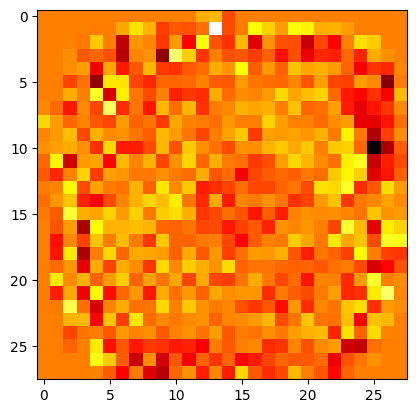

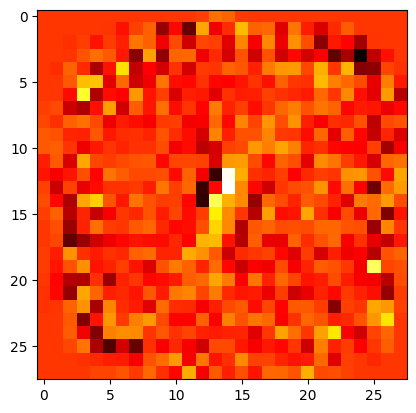

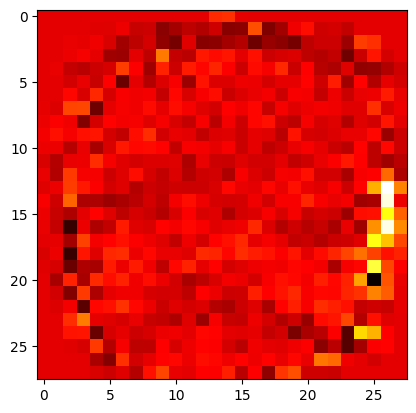

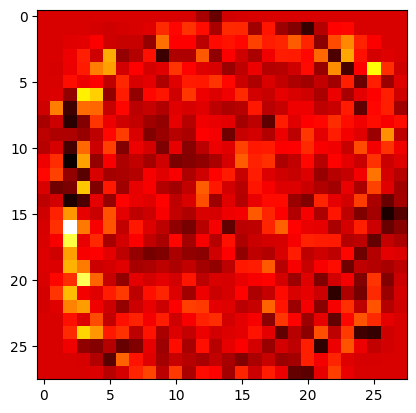

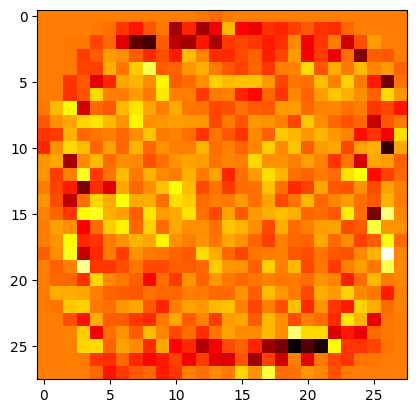

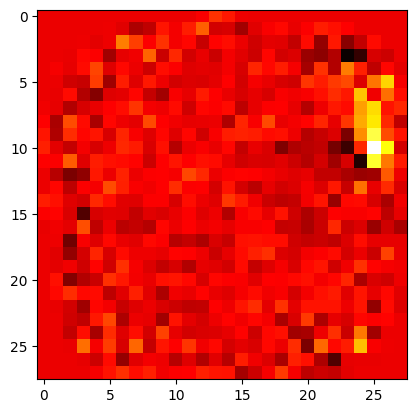

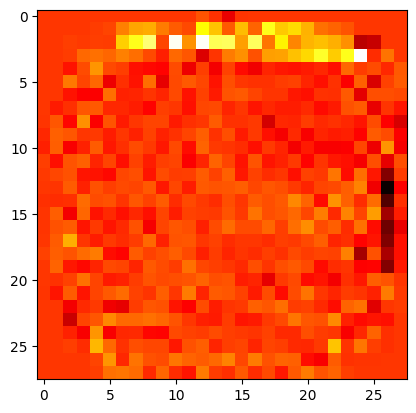

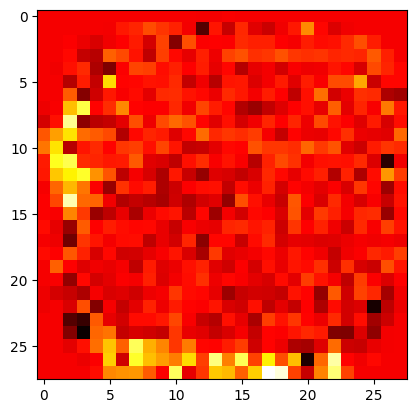

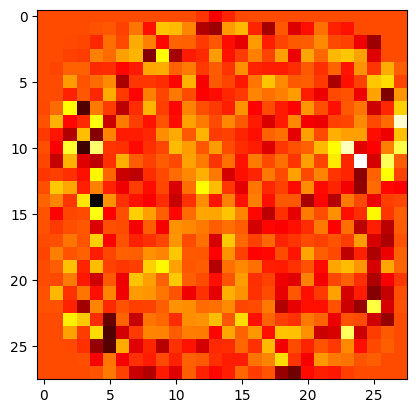

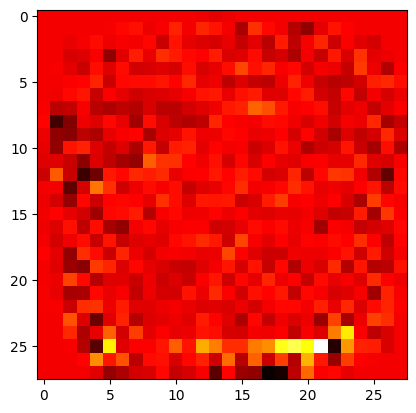

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

# Reshape the weight matrix into 28 pixel by 28 pixel image
mnist_weights_r = mnist_weights.reshape((10,28,28))

# Verify our data didn't change
assert(mnist_weights[0].mean() == mnist_weights_r[0].mean())
for i in range(784):
    assert(mnist_weights[0][i] == mnist_weights_r[0][int(i/28)][i%28])

# Normalize weight value to 255 uint8s
# mnist_weights_255 = mnist_weights_r * 255
# mnist_weight_imgs = mnist_weights_255.astype(np.uint8)
# assert(mnist_weight_imgs.dtype == np.uint8)

for i in range(10):
    plt.figure()
    # print(f"Digit {i}")
    plt.imshow(mnist_weights_r[i], 'hot', interpolation='none')

## Visualizing dot products

Dot product of two vectors shows how similar they are to each other.

$$a = \begin{bmatrix}0, 1, 0, 1\end{bmatrix}$$
$$b = \begin{bmatrix}1, 0, 1, 0\end{bmatrix}$$
$$The\ Dot\ Product:\ a * b = a_1 b_1 + ... + a_4 b_4 = 0 + ... + 0 = 0$$

Since $a$ and $b$ have no common elements, you can see they have no relation.

This implies that if the weights for a particular output are similar to the input, then it will have a higher dot product score than one which is dissimilar.
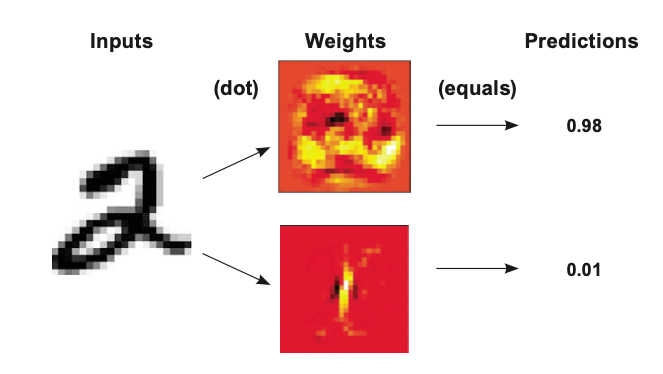

## Summary
### Gradient descent is a general learning algorithm

Gradient descent is a very flexible learning algorithm and as long as a problem can be shaped to provide an error function and delta, gradient descent can provide direction to how to adjust the weights to reduce the error.